In [2]:
import moneymaker as mm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import yfinance as yf
from sklearn.pipeline import make_pipeline

plt.rcParams["axes.grid"] = True
plt.style.use('dark_background')
plt.rcParams["grid.color"] = "#222222"
plt.rcParams["figure.figsize"] = (10,6)

stock = yf.Ticker("XOM")
ohlcv = stock.history(period='3y')

In [3]:
# signal
# trade if stock is above 100 day max and ignore last 5 days (to ignore small pullbacks)
# only trade as long as stock is above 13 day VWEMA

def breakout(X,horizon=100,pullback=5):
    return X.rolling(horizon-pullback).max().shift(pullback).fillna(X.max())

signal_pipe = make_pipeline(
    mm.make_union(
        make_pipeline(mm.FromOHLCV('c')),
        make_pipeline(mm.FromOHLCV('c'), mm.Wrapper(breakout)),
        make_pipeline(mm.FromOHLCV('cv'), mm.VWEMA(13))
    ),
    mm.IsLargestCol(colidx=0)
)

backtest_pipe = make_pipeline(
    mm.make_union(
        make_pipeline(mm.FromOHLCV('c')),
        signal_pipe
    ),
    mm.SimpleBacktester(add_buy_and_hold=True)
)


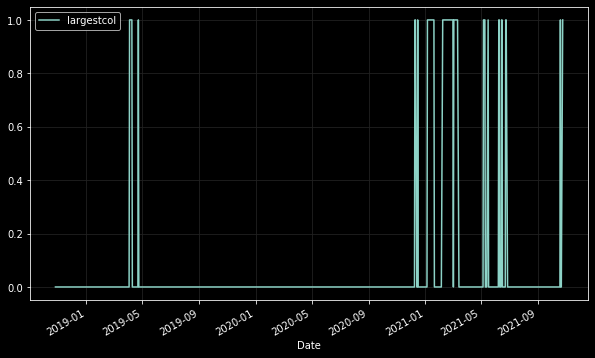

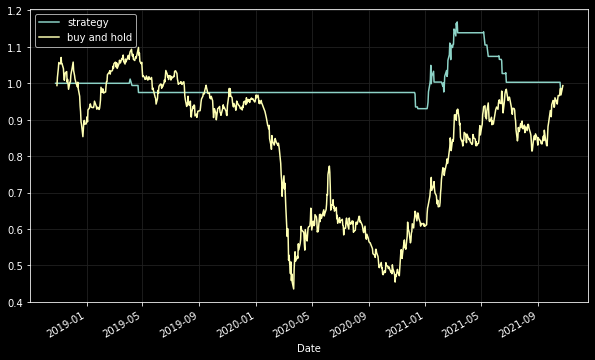

In [4]:
signal_pipe.fit_transform(ohlcv).plot()
backtest_pipe.fit_transform(ohlcv).plot()